In [129]:
# !pip install mlforecast

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams

from mlforecast import MLForecast
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error as MSE

In [131]:
rcParams['figure.figsize'] = 15, 6

In [132]:
path_matlab = "../../data/series/series_matlab.csv"
path_fires = "../../data/series/series_fires_acre.csv"

series_matlab = pd.read_csv(path_matlab)
series_fires = pd.read_csv(path_fires, encoding='ISO-8859-1')

# Series Matlab

In [133]:
series_matlab

,month,matlab
0,2009-01-31,19
1,2009-02-28,27
2,2009-03-31,24
3,2009-04-30,32
4,2009-05-31,42
...,...,...
127,2019-08-31,371
128,2019-09-30,362
129,2019-10-31,523
130,2019-11-30,479


In [134]:
series_matlab['month'] = pd.to_datetime(series_matlab['month'])

<Axes: xlabel='month'>

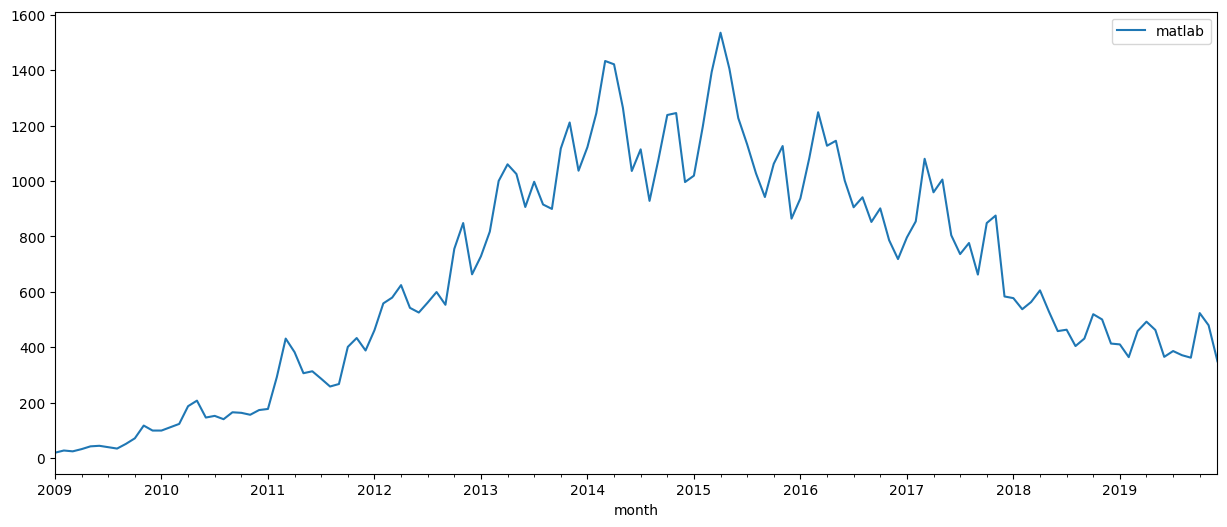

In [135]:
series_matlab_plot = series_matlab.set_index('month')
series_matlab_plot.plot()

In [136]:
series_matlab['unique_id'] = 'matlab'
series_matlab.rename(columns={'month': 'ds', 'matlab': 'y'}, inplace=True)
series_matlab

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab
130,2019-11-30,479,matlab


In [137]:
test = series_matlab.groupby('unique_id').tail(12)
train = series_matlab.drop(test.index, axis = 0)

In [138]:
train

,ds,y,unique_id
0,2009-01-31,19,matlab
1,2009-02-28,27,matlab
2,2009-03-31,24,matlab
3,2009-04-30,32,matlab
4,2009-05-31,42,matlab
...,...,...,...
115,2018-08-31,404,matlab
116,2018-09-30,431,matlab
117,2018-10-31,519,matlab
118,2018-11-30,500,matlab


In [139]:
test

,ds,y,unique_id
120,2019-01-31,410,matlab
121,2019-02-28,364,matlab
122,2019-03-31,458,matlab
123,2019-04-30,492,matlab
124,2019-05-31,462,matlab
125,2019-06-30,365,matlab
126,2019-07-31,386,matlab
127,2019-08-31,371,matlab
128,2019-09-30,362,matlab
129,2019-10-31,523,matlab


In [140]:
# models = [
#     DecisionTreeRegressor(criterion='friedman_mse', splitter='random'),
#     MLPRegressor(activation='relu', solver='lbfgs', learning_rate='adaptive'),
#     KNeighborsRegressor()
# ]

models = [
    DecisionTreeRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

In [141]:
fcst = MLForecast(
    models=models,
    freq='M',
    lags=[1, 2, 3, 4, 5, 6, 7, 8, 9]
)

In [142]:
fcst.fit(train, fitted=True)

MLForecast(models=[DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9'], date_features=[], num_threads=1)

In [143]:
predictions = fcst.predict(12)
predictions

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

,unique_id,ds,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2019-01-31,519.0,564.168945,523.599976
1,matlab,2019-02-28,561.0,530.082397,518.400024
2,matlab,2019-03-31,624.0,515.354431,525.200012
3,matlab,2019-04-30,624.0,564.192749,576.200012
4,matlab,2019-05-31,755.0,541.362976,598.599976
5,matlab,2019-06-30,1000.0,571.587585,598.599976
6,matlab,2019-07-31,1060.0,586.554443,663.200012
7,matlab,2019-08-31,959.0,600.307556,663.200012
8,matlab,2019-09-30,997.0,605.759460,663.200012
9,matlab,2019-10-31,997.0,630.398560,740.200012


In [144]:
forecast = fcst.forecast_fitted_values()
forecast

,unique_id,ds,y,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,matlab,2009-10-31,71.0,71.0,36.974770,99.400002
1,matlab,2009-11-30,117.0,117.0,42.548569,99.400002
2,matlab,2009-12-31,99.0,99.0,58.381462,99.400002
3,matlab,2010-01-31,99.0,99.0,66.202972,109.800003
4,matlab,2010-02-28,111.0,111.0,76.456512,123.800003
...,...,...,...,...,...,...
106,matlab,2018-08-31,404.0,404.0,685.384094,463.399994
107,matlab,2018-09-30,431.0,431.0,610.229858,523.599976
108,matlab,2018-10-31,519.0,519.0,592.262268,523.599976
109,matlab,2018-11-30,500.0,500.0,560.578064,523.599976


### All Predictions

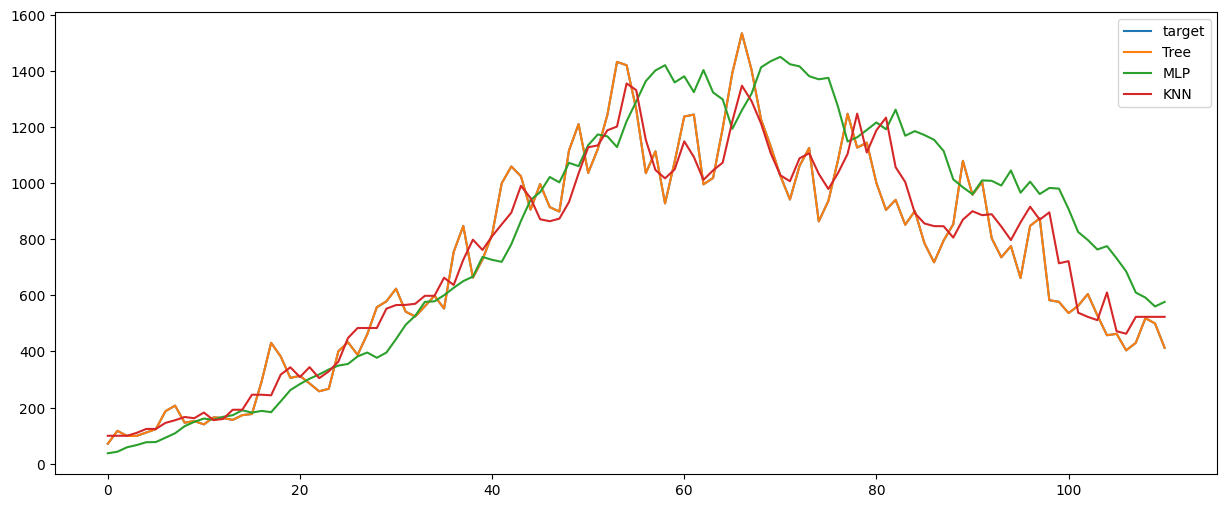

In [145]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

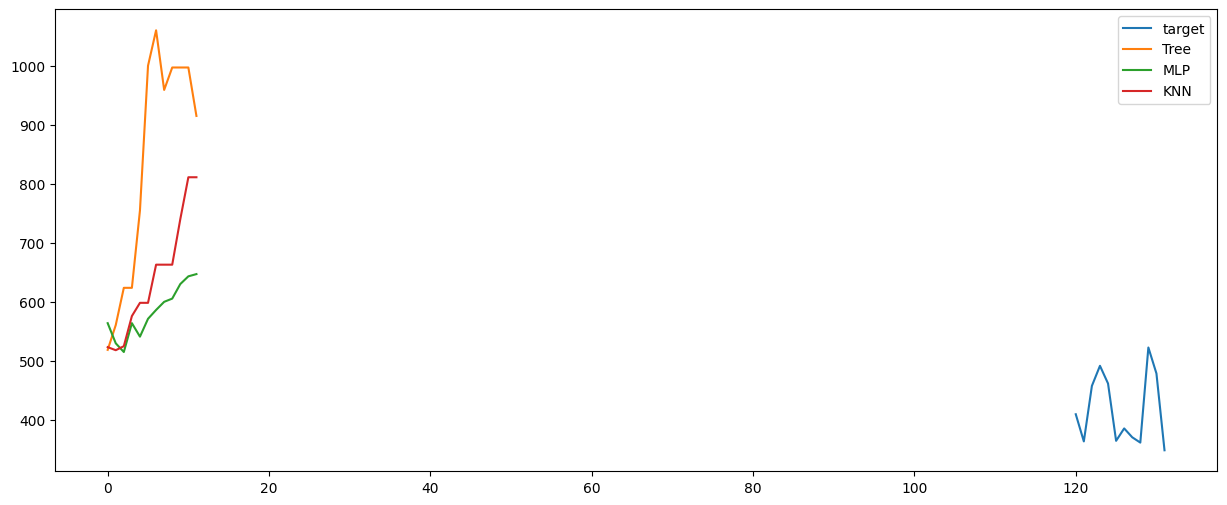

In [146]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### MLP x Target

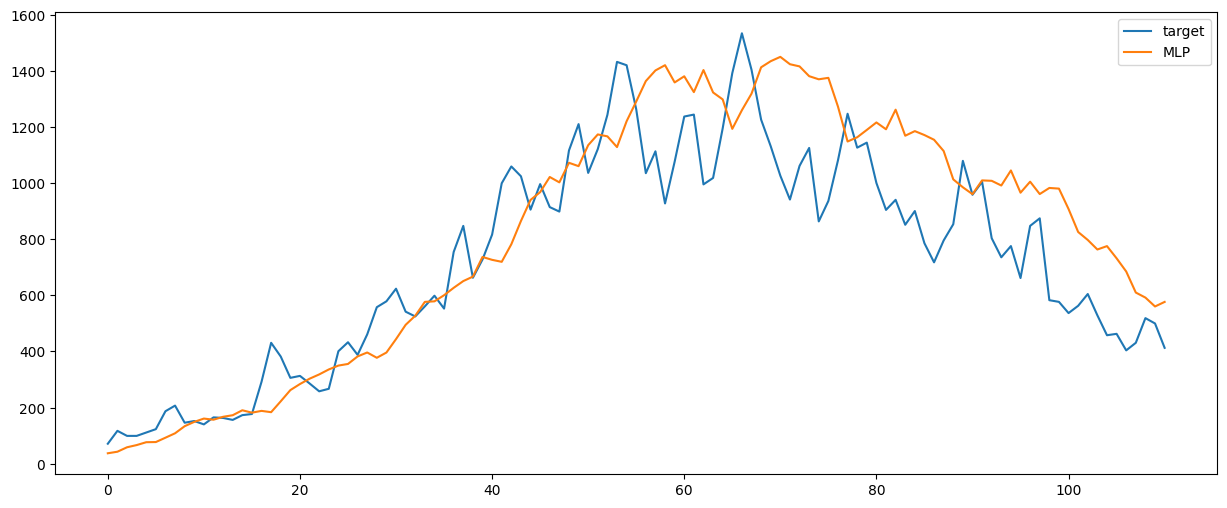

In [147]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

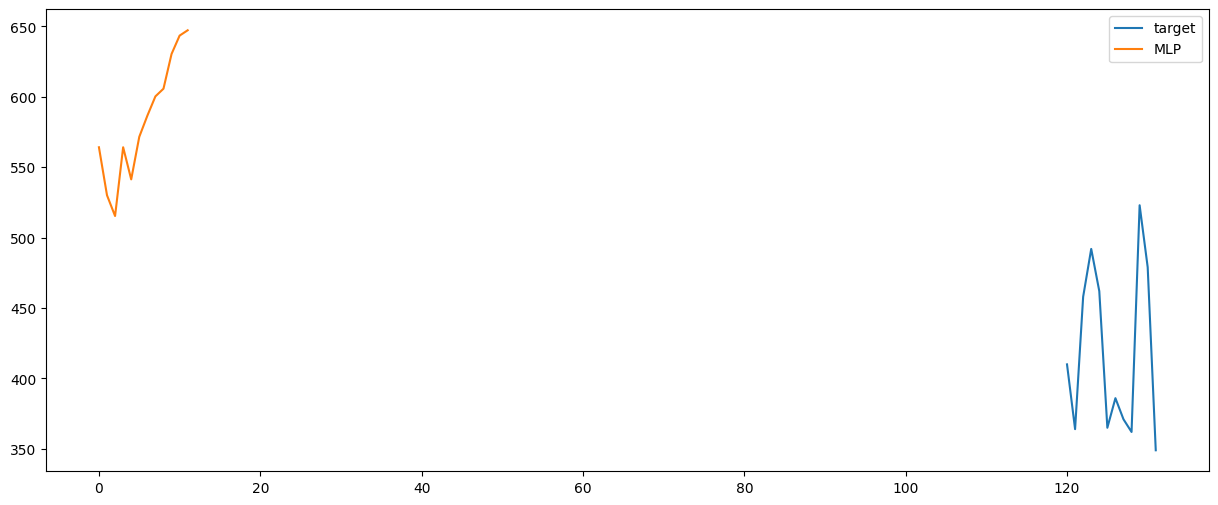

In [148]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

### KNN x Target

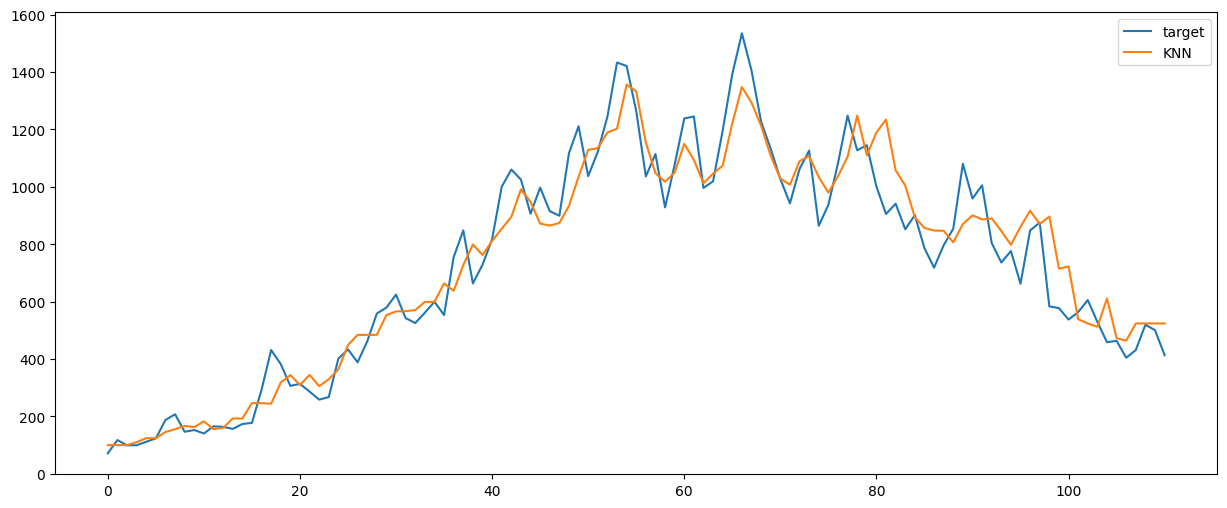

In [149]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

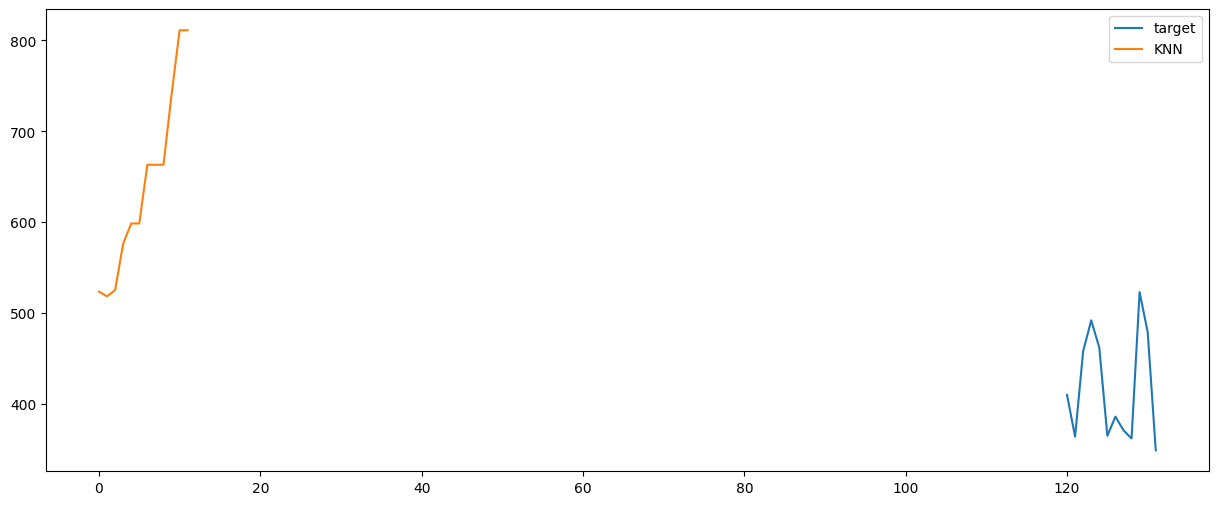

In [150]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### Tree x Target

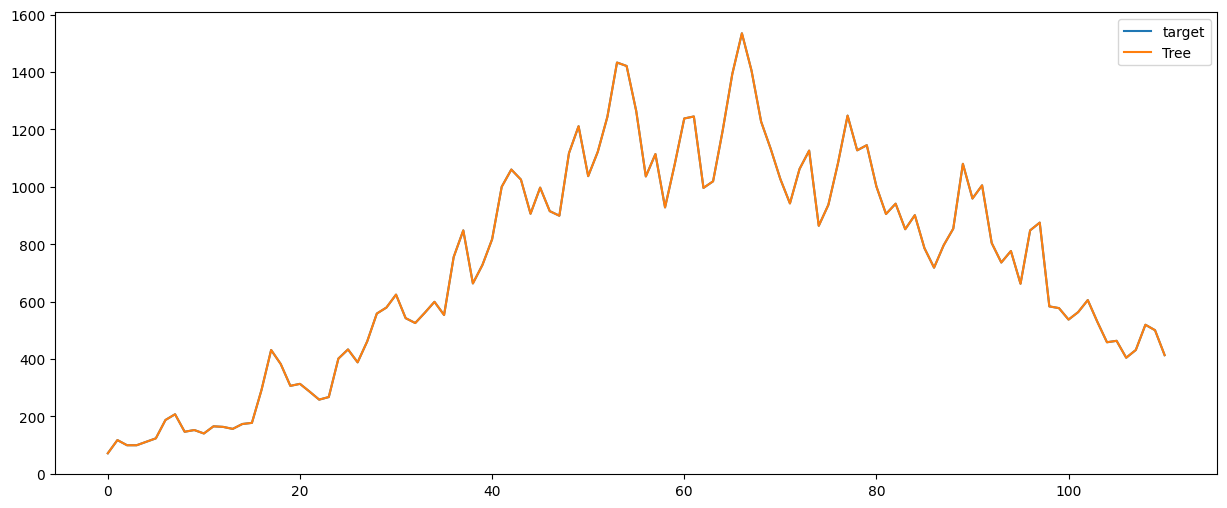

In [151]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

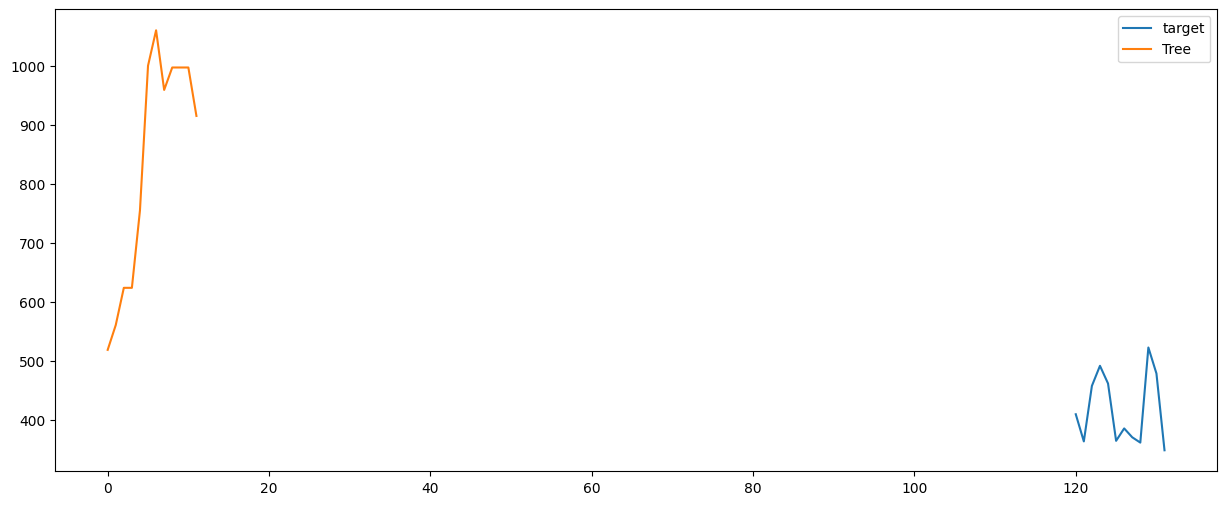

In [152]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

# Series Fires

In [86]:
series_fires

,date,number
0,1998-01-01,0.000
1,1998-02-01,0.000
2,1998-03-01,0.000
3,1998-04-01,0.000
4,1998-05-01,0.000
...,...,...
234,2017-07-01,457.000
235,2017-08-01,1.493
236,2017-09-01,3.429
237,2017-10-01,1.508


In [87]:
series_fires['date'] = pd.to_datetime(series_fires['date'])

In [88]:
series_fires['unique_id'] = 'ACRE'
series_fires.rename(columns={'date': 'ds', 'number': 'y'}, inplace=True)
series_fires

,ds,y,unique_id
0,1998-01-01,0.000,ACRE
1,1998-02-01,0.000,ACRE
2,1998-03-01,0.000,ACRE
3,1998-04-01,0.000,ACRE
4,1998-05-01,0.000,ACRE
...,...,...,...
234,2017-07-01,457.000,ACRE
235,2017-08-01,1.493,ACRE
236,2017-09-01,3.429,ACRE
237,2017-10-01,1.508,ACRE


In [89]:
test = series_fires.groupby('unique_id').tail(12)
train = series_fires.drop(test.index, axis = 0)

In [90]:
train

,ds,y,unique_id
0,1998-01-01,0.000,ACRE
1,1998-02-01,0.000,ACRE
2,1998-03-01,0.000,ACRE
3,1998-04-01,0.000,ACRE
4,1998-05-01,0.000,ACRE
...,...,...,...
222,2016-07-01,533.000,ACRE
223,2016-08-01,2.188,ACRE
224,2016-09-01,3.586,ACRE
225,2016-10-01,509.000,ACRE


In [91]:
test

,ds,y,unique_id
227,2016-12-01,6.000,ACRE
228,2017-01-01,0.000,ACRE
229,2017-02-01,1.000,ACRE
230,2017-03-01,0.000,ACRE
231,2017-04-01,1.000,ACRE
232,2017-05-01,10.000,ACRE
233,2017-06-01,45.000,ACRE
234,2017-07-01,457.000,ACRE
235,2017-08-01,1.493,ACRE
236,2017-09-01,3.429,ACRE


In [92]:
models = [
    DecisionTreeRegressor(),
    MLPRegressor(),
    KNeighborsRegressor()
]

In [93]:
fcst = MLForecast(
    models=models,
    freq='M',
    lags=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
)

In [94]:
fcst.fit(train, fitted=True)

MLForecast(models=[DecisionTreeRegressor, MLPRegressor, KNeighborsRegressor], freq=M, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'], date_features=[], num_threads=1)

In [95]:
predictions = fcst.predict(12)
predictions

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\utilsforecast\processing.py:362: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.

,unique_id,ds,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,ACRE,2016-11-30,4.253,2.881518,1.8000
1,ACRE,2016-12-31,1.000,25.500574,1.0000
2,ACRE,2017-01-31,2.000,-8.202482,1.2000
3,ACRE,2017-02-28,1.000,-15.647314,0.6000
4,ACRE,2017-03-31,1.000,2.068675,2.0000
5,ACRE,2017-04-30,839.000,62.958202,5.4000
6,ACRE,2017-05-31,71.000,40.051763,25.4000
7,ACRE,2017-06-30,1.100,342.823635,203.2000
8,ACRE,2017-07-31,425.000,37.365939,253.6158
9,ACRE,2017-08-31,2.175,16.660351,2.4362


In [96]:
forecast = fcst.forecast_fitted_values()
forecast

,unique_id,ds,y,DecisionTreeRegressor,MLPRegressor,KNeighborsRegressor
0,ACRE,1999-01-01,0.000,0.000,0.768830,1.2000
1,ACRE,1999-02-01,0.000,0.000,-4.984335,0.4000
2,ACRE,1999-03-01,0.000,0.000,-5.140497,1.2000
3,ACRE,1999-04-01,0.000,0.000,5.189452,2.4000
4,ACRE,1999-05-01,0.000,0.000,11.838176,8.4000
...,...,...,...,...,...,...
210,ACRE,2016-07-01,533.000,533.000,166.065569,115.4000
211,ACRE,2016-08-01,2.188,2.188,94.099406,297.5740
212,ACRE,2016-09-01,3.586,3.586,38.013896,11.0624
213,ACRE,2016-10-01,509.000,509.000,769.986517,506.6000


### All Predictions

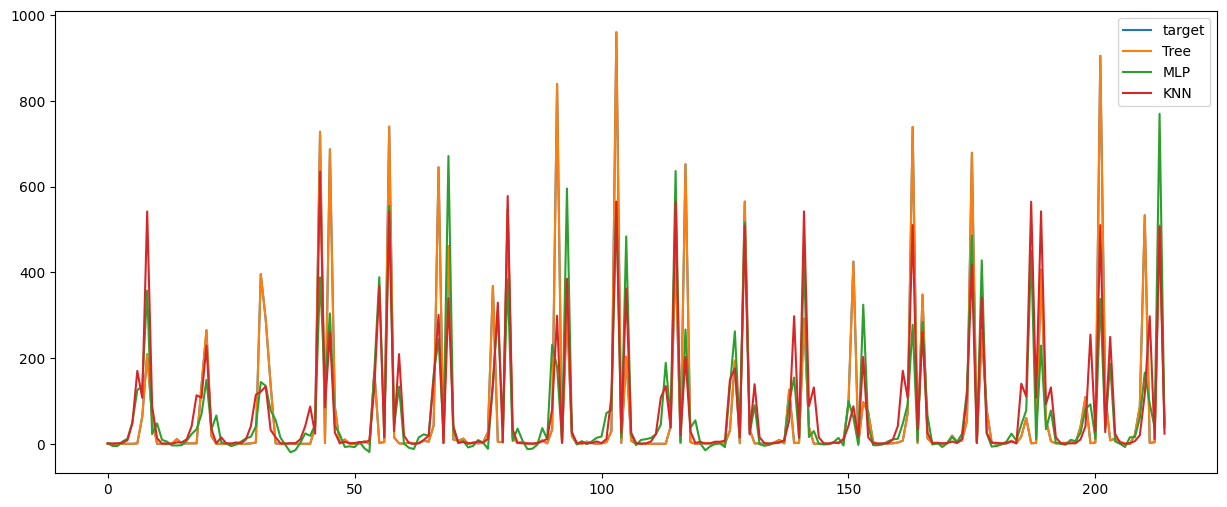

In [97]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

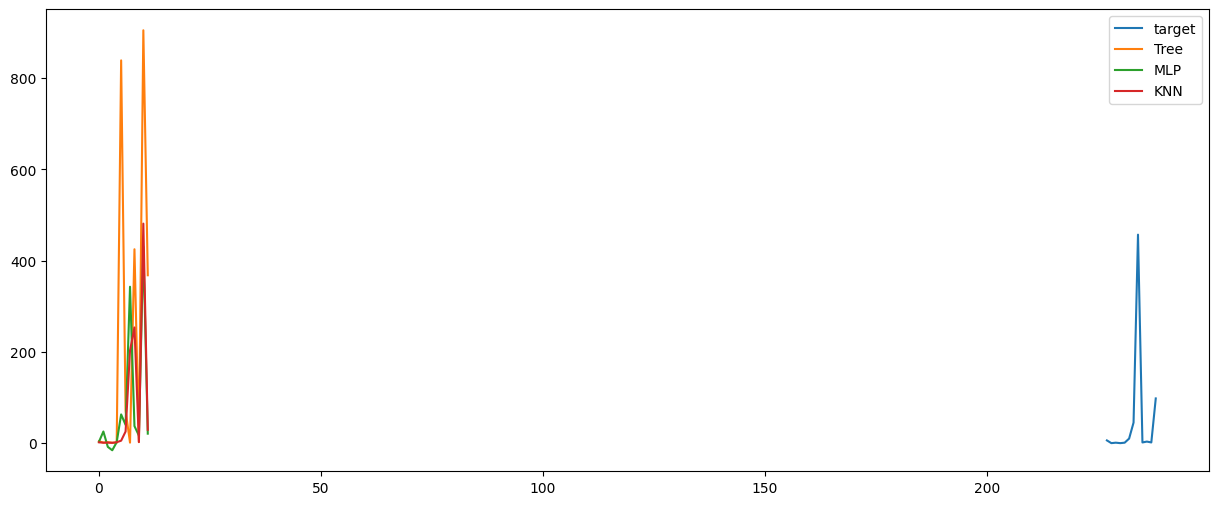

In [98]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### MLP x Target

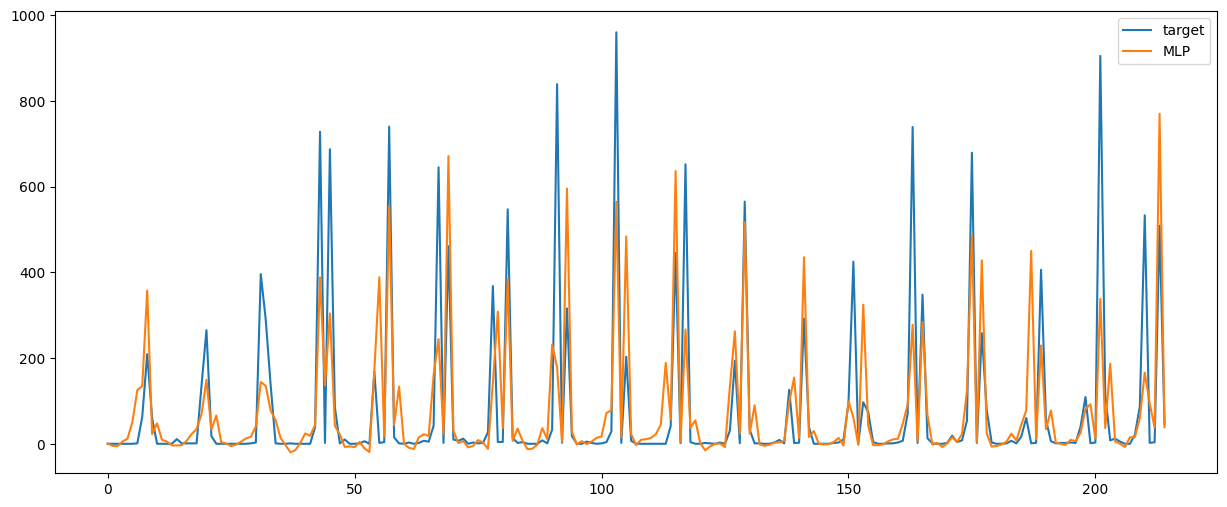

In [99]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

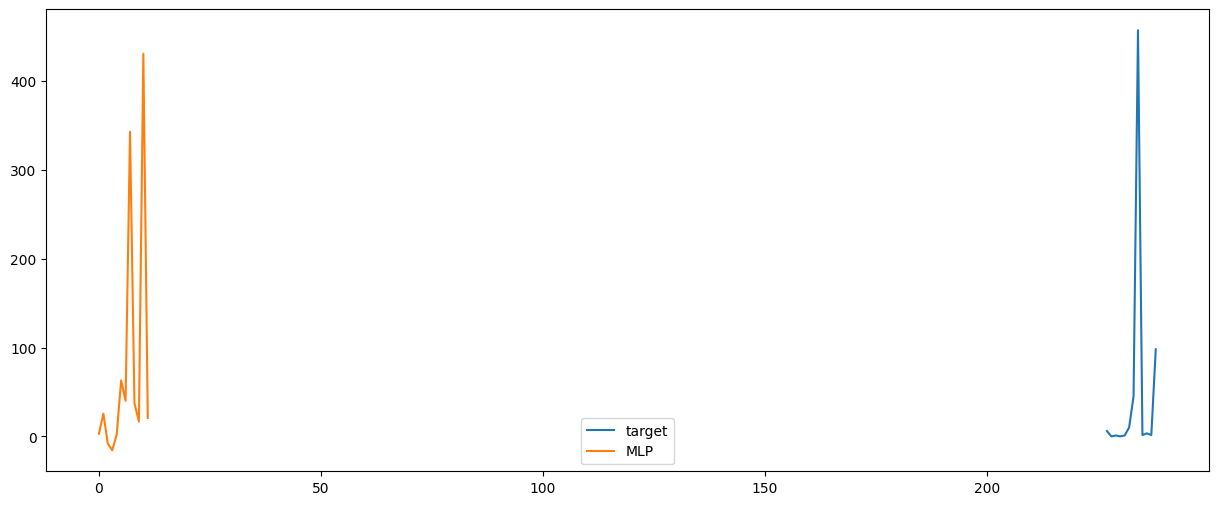

In [103]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['MLPRegressor'], label = 'MLP')
plt.legend(loc = 'best')
plt.show()

### KNN x Target

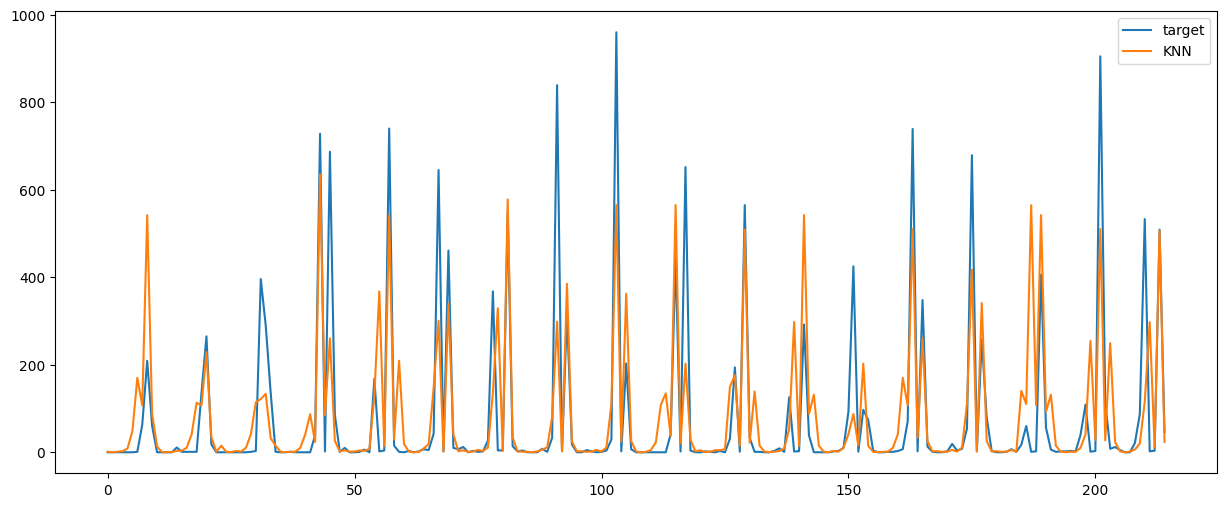

In [100]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

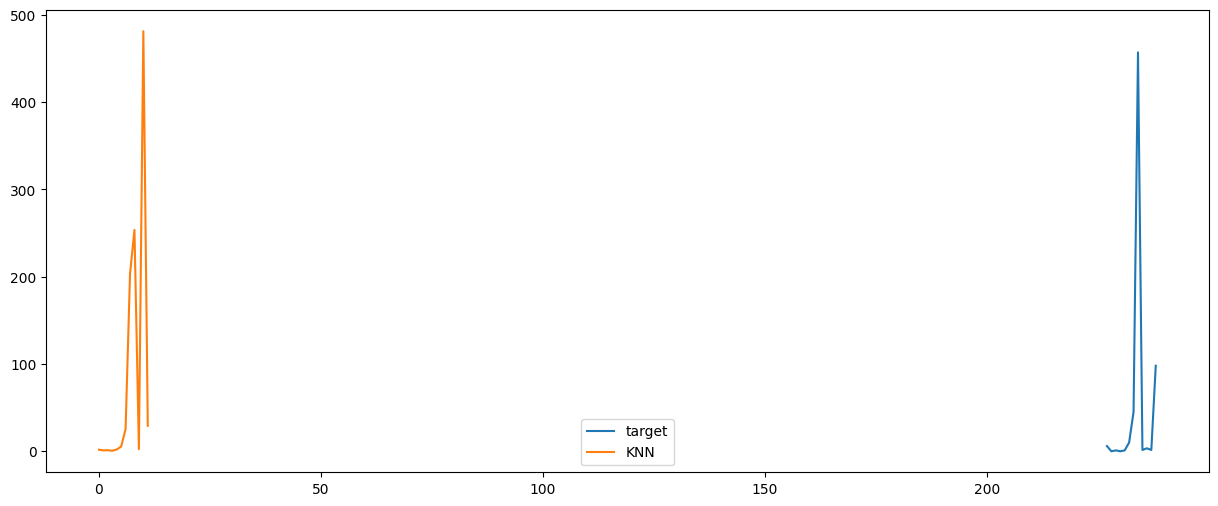

In [102]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['KNeighborsRegressor'], label = 'KNN')
plt.legend(loc = 'best')
plt.show()

### Tree x Target

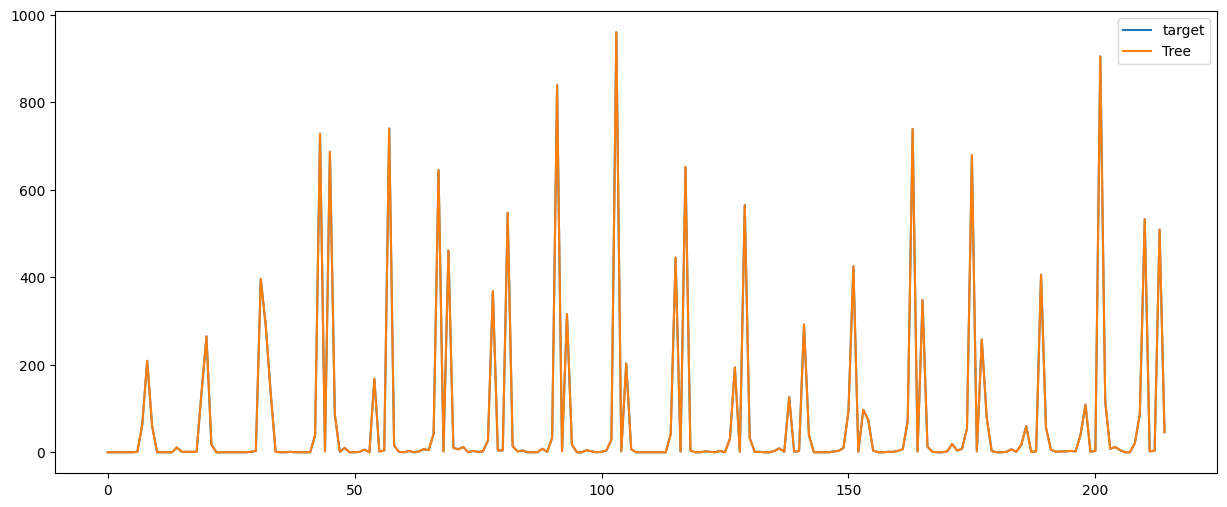

In [101]:
plt.plot(forecast['y'], label = 'target')
plt.plot(forecast['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()

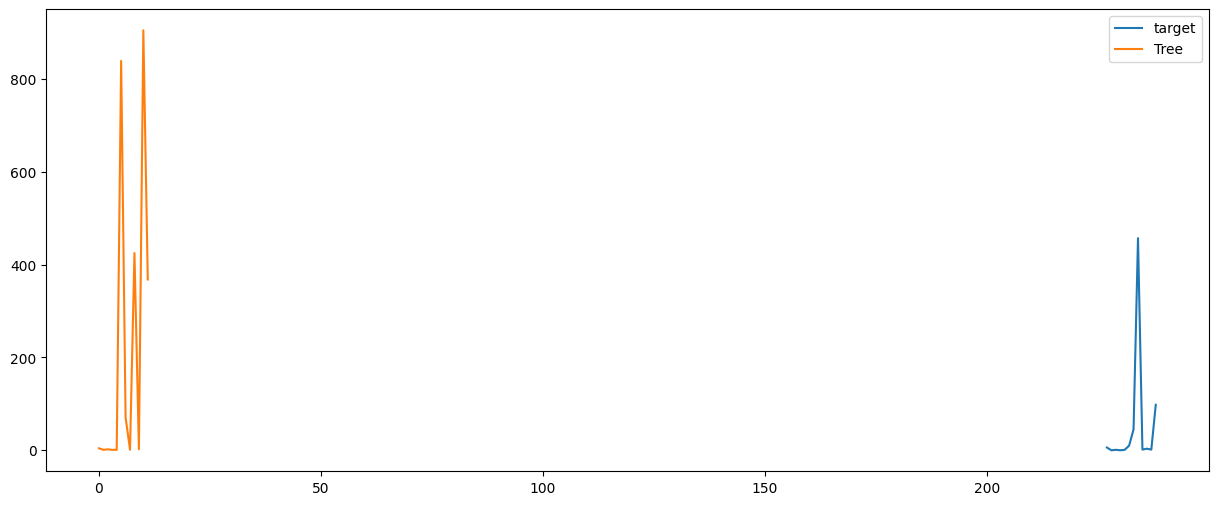

In [104]:
plt.plot(test['y'], label = 'target')
plt.plot(predictions['DecisionTreeRegressor'], label = 'Tree')
plt.legend(loc = 'best')
plt.show()